In [1]:
import pandas as pd
import re
import json
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

In [2]:
file = '최남매_골프.json' # Youtube로부터 8/3일 데이터 읽어옴
data = None
with open(file, 'r') as f:
    data=json.load(f)

channel_id, stats = data.popitem()

print(channel_id, '누적뷰: ' + stats['channel_statistics']['viewCount'], 
      '가입자수: ' + stats['channel_statistics']['subscriberCount'] )

UCD902zDdQCJSRDh5CPvWbig 누적뷰: 10896377 가입자수: 69000


In [3]:
video_stats = stats['video_data']

In [4]:
video_data = []
for vid in video_stats.items():
    video_id = vid[0]
    title = vid[1]['title']
    views = int(vid[1]['viewCount'])
    likes = int(vid[1]['likeCount'])
    dislikes = int(vid[1]['dislikeCount'])
    # comments = int(vid[1]['commentCount'])
    release = vid[1]['publishedAt']
    video_data.append([title, views, likes, dislikes, release])

In [5]:
video = pd.DataFrame(video_data, columns=['title','viewCount', 'likeCount', 'dislikeCount', 'release'])
video['release'] = video['release'].apply(lambda x: x[:10])

In [6]:
video.set_index('title', inplace=True)

In [7]:
video.sort_values(by='viewCount', ascending=False)

video['release'] = pd.to_datetime(video['release'])

## 조회수 기준 상위 30 동영상 제목

In [8]:
video.sort_values('viewCount', ascending=False).head(30) # 161개 비디오 중 누적 뷰 상위 30개만 디스플레이

,viewCount,likeCount,dislikeCount,release
title,,,,
"백스윙 잘하는법 , 백스윙올리는법 , 3단계를 익혀서 백스윙마스터하기.",974681,9068,396,2018-07-26
230M나가던 저를 평균260M로 만들어준 드라이버 거리내는 방법,652912,5318,196,2018-07-11
최민욱프로) 드라이버에서 아주 중요한 부분입니다! 드라이버 손목 풀림의 중요성! (드라이버잘치는법),636198,4241,308,2018-11-19
"가을하늘 아래 미녀골퍼들의 골프!? ※눈호강주의 (최나연프로,최예지프로,정서빈프로)",469017,2328,143,2019-10-14
골반과 하체를 써주시면 좀더 어깨와 상체에 불필요한 힘이빠질수 있습니다.,341231,3531,140,2018-08-29
최민욱프로vs최예지프로 드디어 한판 붙었습니다! 최남매의 자존심 대결 라운드 (전반9홀),254753,2116,74,2019-03-04
드라이버 좀더 쉽게 푸시 턴 이어서 하는법 ! 드라이버 잘치는방법!,205063,2460,61,2018-09-27
최민욱프로] 에이밍을 정확히 서는 방법 (초보골퍼분들 필수),187694,956,39,2020-04-06
최민욱프로]임팩트시 몸이 일어서는 얼리익스텐션! 이유를 알고 고쳐보세요,186760,3256,91,2019-07-11


In [9]:
video['viewCount/day'] = video['viewCount'] / ((pd.to_datetime('today') - video['release']).dt.days)
video['viewCount/day'] = video['viewCount/day'].astype('int')

## 일평균 조회수 기준 상위 30위 (등록일 보정)

In [10]:
video.sort_values('viewCount/day', ascending=False).head(30) # 161개 비디오중 일 뷰 상위 30개만 디스플레이

,viewCount,likeCount,dislikeCount,release,viewCount/day
title,,,,,
[라운드영상] 상큼하지만 살벌한 프로골퍼들의 라운드♡,141534,1677,56,2020-06-23,3452
[라운드영상]그녀들의 명량골프 후반홀.여러분은 누굴 응원하시나요?,110355,1306,40,2020-07-01,3344
최예지프로]저의 드라이버 노하우 알려드릴게요!,24323,553,52,2020-07-24,2432
"가을하늘 아래 미녀골퍼들의 골프!? ※눈호강주의 (최나연프로,최예지프로,정서빈프로)",469017,2328,143,2019-10-14,1595
최민욱프로] 에이밍을 정확히 서는 방법 (초보골퍼분들 필수),187694,956,39,2020-04-06,1577
"백스윙 잘하는법 , 백스윙올리는법 , 3단계를 익혀서 백스윙마스터하기.",974681,9068,396,2018-07-26,1318
최예지프로]스윙이 급해질때 이방법 써보세요!!,148782,1078,36,2020-03-26,1144
최민욱프로) 드라이버에서 아주 중요한 부분입니다! 드라이버 손목 풀림의 중요성! (드라이버잘치는법),636198,4241,308,2018-11-19,1021
230M나가던 저를 평균260M로 만들어준 드라이버 거리내는 방법,652912,5318,196,2018-07-11,865


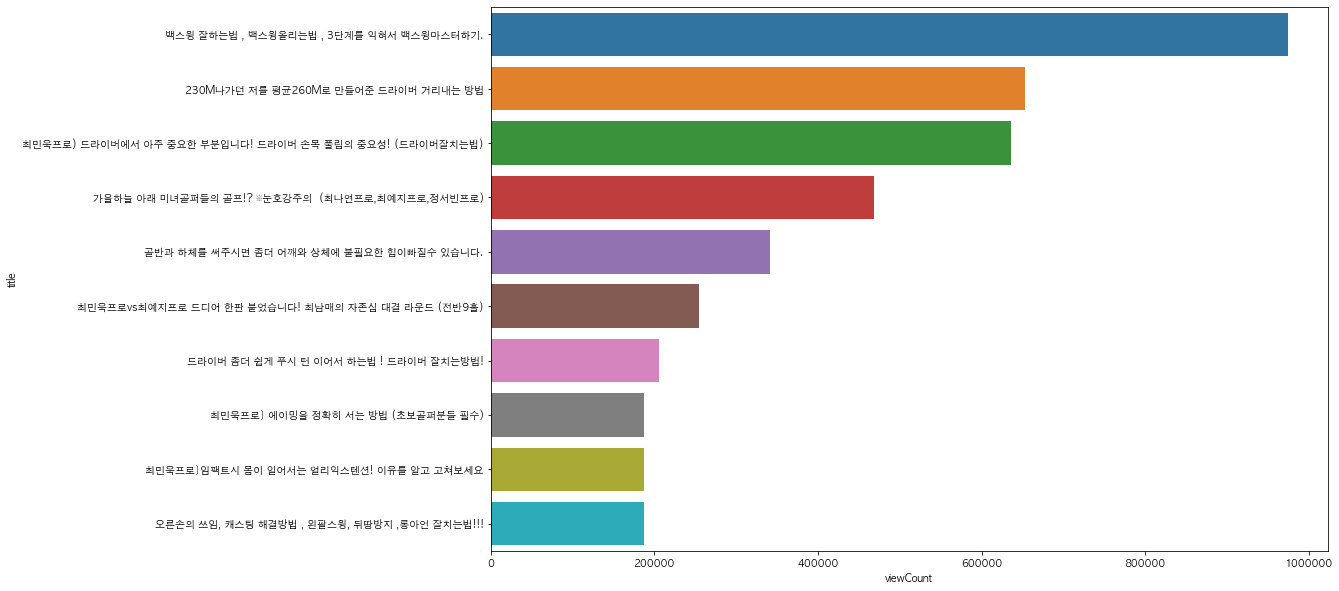

In [11]:
plt.figure(figsize=(15,10))
video_reset_index = video.reset_index()
sns.barplot(x='viewCount', y='title', data=video_reset_index.sort_values('viewCount', ascending=False)[:10])

In [12]:
df = video.reset_index()
df = df[['title', 'viewCount']].sort_values('viewCount', ascending=False)

In [13]:
import re
df['refined'] = df['title'].apply(lambda x:re.sub('[^가-힣\s0-9]', '', x))

In [14]:
sentences = df['refined'].values
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=100,
    min_cohesion_forward=0.05, 
    min_right_branching_entropy=0.0
)
word_extractor.train(sentences) # list of str or like
words = word_extractor.extract()

training was done. used memory 0.136 Gb
all cohesion probabilities was computed. # words = 3
all branching entropies was computed # words = 317
all accessor variety was computed # words = 317


In [15]:
from soynlp.tokenizer import LTokenizer
from soynlp.utils import DoublespaceLineCorpus

cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

In [16]:
df['tokenized'] = df['refined'].apply(lambda x:tokenizer.tokenize(x,remove_r=True))

In [17]:
#20% 
thresh = int(len(df) *0.2)
df20 = df[:thresh]

In [18]:
words = []
for i in df20['tokenized']:
    for k in i:
        words.append(k)

In [19]:
from collections import Counter
count = Counter(words)
word_dict = dict(count)

## 채널별 상위 20%에 많이 등장하는 단어

In [20]:
sort_orders = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_orders:
	print(i[0], i[1])

최민욱 14
드라이버 5
골프 4
방법 3
중요성 3
라운드 3
고쳐보세요 3
잘치는법 3
위한 3
손목 2
좀더 2
대결 2
쉽게 2
스크린 2
통해서 2
여러가지 2
오른팔꿈치를 2
아이언 2
겨드랑이를 2
팔로우스루 2
백스윙 1
잘하는법 1
백스윙올리는법 1
3단계를 1
익혀서 1
백스윙마스터하기 1
230나가던 1
저를 1
평균260로 1
만들어준 1
거리내는 1
드라이버에서 1
아주 1
중요한 1
부분입니다 1
풀림의 1
드라이버잘치는법 1
가을하늘 1
아래 1
미녀골퍼들의 1
눈호강주의 1
최나연프로최예지프로정서빈프로 1
골반과 1
하체를 1
써주시면 1
어깨와 1
상체에 1
불필요한 1
힘이빠질수 1
있습니다 1
드디어 1
한판 1
붙었습니다 1
최남매의 1
자존심 1
전반9홀 1
푸시 1
턴 1
이어서 1
하는법 1
잘치는방법 1
에이밍을 1
정확히 1
서는 1
초보골퍼분들 1
필수 1
몸이 1
일어서는 1
얼리익스텐션 1
이유를 1
알고 1
오른손의 1
쓰임 1
캐스팅 1
해결방법 1
왼팔스윙 1
뒤땅방지 1
롱아언 1
골프존 1
안성플레이영상 1
스크린골프 1
후반전 1
알바트로스 1
보신적 1
있나요 1
올바른 1
궤도 1
만드는법 1
다운스윙 1
순서 1
연습을 1
롱클럽을 1
쳐보세요 1
미녀프로골퍼 1
2명과 1
했습니다 1
버디몇개저희들의 1
메뉴는 1
뭘까요최나연프로최예지프로정서빈프로 1
최예지프로스윙이 1
급해질때 1
이방법 1
써보세요 1
라운드영상 1
상큼하지만 1
살벌한 1
프로골퍼들의 1
백스윙과 1
드릴 1
제가 1
스윙으로 1
보여드릴게요 1
스윙속에서 1
사용해보셨나요 1
캐스팅을 1
적게나가는 1
거리와 1
정확하지못한 1
임팩에 1
고민이셨던분들을 1
사용법 1
한가지 1
드릴로 1
문제점을 1
임팩 1
아이언푸시 1
슬라이스줄이는법 1
무조건10타 1
줄일수있는 1
스크린첫번째 1
지금껏 1
볼수없었던 1
색다른 1
플레이 1
최예지최민욱정서빈 1
붙이면 1
거리가 1
안나시는 1
분들 1
이 1
영상을 1
통